In [41]:
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)
# 1. Import
from fastai.tabular.all import *
# 2. Data
df = pd.read_csv('./input/fashion-mnist_train.csv', dtype={'label':'category'})
# 3. Dataloader
dls = TabularDataLoaders.from_df(df, y_names='label', bs=4096, procs=[Normalize])
# 4. Learner
learn = tabular_learner(dls, layers=[100], opt_func=SGD, metrics=accuracy, config=dict(use_bn=False, bn_cont=False))
# 5. Fit
learn.fit(40, lr=0.2)

True True


epoch,train_loss,valid_loss,accuracy,time
0,1.195676,0.793689,0.734833,00:00
1,0.920110,0.631682,0.775417,00:00
2,0.789894,0.572074,0.790083,00:00
3,0.705747,0.524104,0.814500,00:00
4,0.648178,0.505223,0.814583,00:00
5,0.604199,0.485578,0.824417,00:00
6,0.569706,0.472585,0.831500,00:00
7,0.541282,0.447933,0.837500,00:00
8,0.518322,0.441115,0.839833,00:00
9,0.497598,0.437529,0.841500,00:00


In [42]:
df_test = pd.read_csv('./input/fashion-mnist_test.csv', dtype={'label': df.label.dtype})

probs, actuals = learn.get_preds(dl=dls.test_dl(df_test))

print(f'Accuracy on test set {float(accuracy(probs, actuals)): 0.2%}')

Accuracy on test set  87.36%


In [6]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


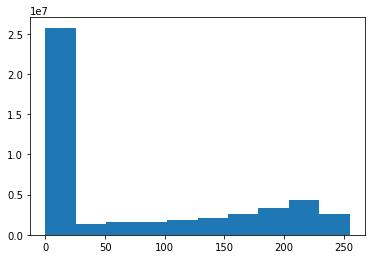

In [7]:
_ = plt.hist(df.filter(like='pixel', axis=1).to_numpy().reshape(-1))

In [10]:
label, *pixels = df.iloc[1]

label, len(pixels)

('9', 784)

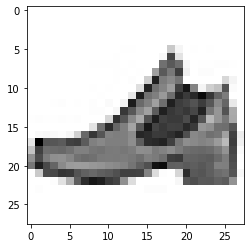

In [11]:
image_array = np.array(pixels).reshape(28, 28)
_ = plt.imshow(image_array, cmap='Greys')

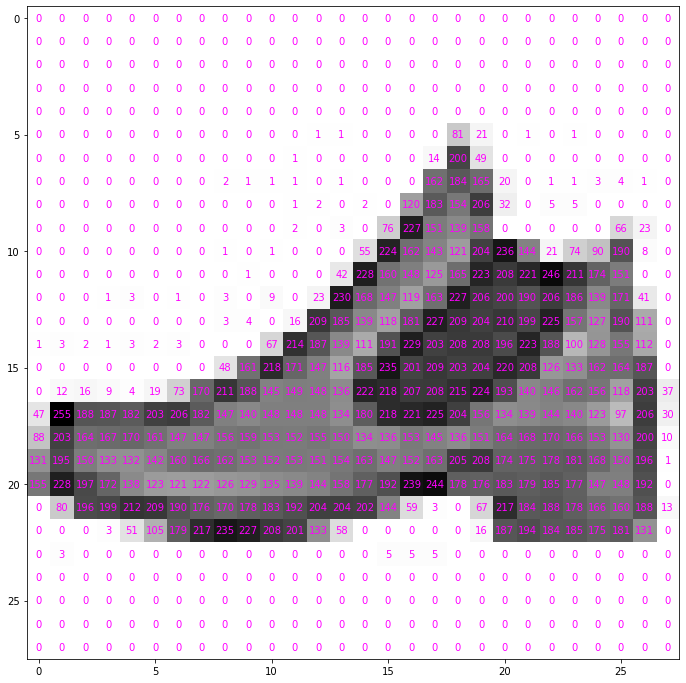

In [12]:
fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(image_array, cmap="Greys")

for i in range(image_array.shape[0]):
    for j in range(image_array.shape[1]):
        text = ax.text(j, i, image_array[i, j], ha="center", va="center", color="magenta")

In [13]:
labels_txt = """
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot
""".strip()

labels = dict([row.split('\t') for row in labels_txt.split('\n')[1:]])
labels

{'0': 'T-shirt/top',
 '1': 'Trouser',
 '2': 'Pullover',
 '3': 'Dress',
 '4': 'Coat',
 '5': 'Sandal',
 '6': 'Shirt',
 '7': 'Sneaker',
 '8': 'Bag',
 '9': 'Ankle boot'}

In [14]:
label, labels[label]

('9', 'Ankle boot')

In [15]:
df.label.map(labels).value_counts()

T-shirt/top    6000
Trouser        6000
Pullover       6000
Dress          6000
Coat           6000
Sandal         6000
Shirt          6000
Sneaker        6000
Bag            6000
Ankle boot     6000
Name: label, dtype: int64

In [16]:
dls = TabularDataLoaders.from_df(df, y_names='label', bs=4096, procs=[Normalize], cont_names=list(df.columns[1:]))

In [17]:
dls.show_batch()

In [18]:
dls.train, dls.valid

(<fastai.tabular.core.TabDataLoader at 0x7f3bdc7f63d0>,
 <fastai.tabular.core.TabDataLoader at 0x7f3bc2b5f190>)

In [19]:
batch = next(iter(dls.train))
type(batch), len(batch)

(tuple, 3)

In [20]:
batch[0]

tensor([], size=(4096, 0), dtype=torch.int64)

In [21]:
print(batch[1].shape)
batch[1]

torch.Size([4096, 784])


tensor([[-0.0085, -0.0237, -0.0278,  ..., -0.1577, -0.0920, -0.0339],
        [-0.0085, -0.0237, -0.0278,  ..., -0.1577, -0.0920, -0.0339],
        [-0.0085, -0.0237, -0.0278,  ..., -0.1577, -0.0920, -0.0339],
        ...,
        [-0.0085, -0.0237, -0.0278,  ..., -0.1577, -0.0920, -0.0339],
        [-0.0085, -0.0237, -0.0278,  ..., -0.1577, -0.0920, -0.0339],
        [-0.0085, -0.0237, -0.0278,  ..., -0.1577, -0.0920, -0.0339]])

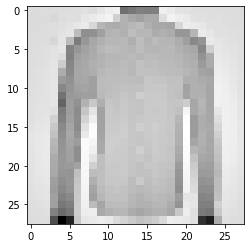

In [22]:
plt.imshow(batch[1][0].reshape(28, 28), cmap='Greys')

In [23]:
print(batch[2].shape)
batch[2]

torch.Size([4096, 1])


tensor([[6],
        [3],
        [1],
        ...,
        [9],
        [7],
        [3]], dtype=torch.int8)

In [24]:
labels[str(batch[2][0][0].item())]

'Shirt'

In [25]:
from collections import Counter

train_label_count = Counter()
for batch in dls.train:
    train_label_count.update(batch[2].squeeze().numpy())

train_label_count

Counter({4: 4462,
         2: 4507,
         0: 4490,
         3: 4556,
         5: 4529,
         6: 4496,
         9: 4499,
         7: 4511,
         8: 4495,
         1: 4511})

In [26]:
valid_label_count = Counter()
for batch in dls.valid:
    valid_label_count.update(batch[2].squeeze().numpy())

valid_label_count

Counter({1: 1224,
         3: 1158,
         5: 1178,
         0: 1225,
         8: 1199,
         6: 1207,
         4: 1216,
         2: 1197,
         7: 1192,
         9: 1204})

In [27]:
n_valid = sum(valid_label_count.values())
n_train = sum(train_label_count.values())

{'n_train': n_train,
 'pct_train': '{:.2%}'.format(n_train / len(df)),
 'n_valid': n_valid,
 'pct_valid': '{:.2%}'.format(n_valid / len(df))}

{'n_train': 45056,
 'pct_train': '75.09%',
 'n_valid': 12000,
 'pct_valid': '20.00%'}

In [28]:
n_train / 4096

11.0

In [29]:
learn = tabular_learner(dls, layers=[100], opt_func=SGD, metrics=accuracy, config=dict(use_bn=False, bn_cont=False))

In [30]:
learn.dls

In [31]:
batch = next(iter(learn.dls.valid))
tuple(x.shape for x in batch)

(torch.Size([4096, 0]), torch.Size([4096, 784]), torch.Size([4096, 1]))

In [32]:
probs, actual = learn.get_preds()

In [33]:
print(probs.shape)
probs

torch.Size([12000, 10])


tensor([[0.1153, 0.1159, 0.0804,  ..., 0.1102, 0.1003, 0.0910],
        [0.1215, 0.1404, 0.1079,  ..., 0.0818, 0.1073, 0.0779],
        [0.0973, 0.1127, 0.1074,  ..., 0.1068, 0.0880, 0.0943],
        ...,
        [0.1377, 0.1011, 0.1133,  ..., 0.0960, 0.0769, 0.0776],
        [0.0979, 0.1037, 0.1304,  ..., 0.1138, 0.0771, 0.0843],
        [0.0656, 0.0972, 0.1623,  ..., 0.0861, 0.0921, 0.0976]])

In [34]:
probs.sum(axis=1)


tensor([1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000])

In [35]:
print(actual.shape)
actual

torch.Size([12000, 1])


tensor([[1],
        [3],
        [5],
        ...,
        [5],
        [5],
        [5]], dtype=torch.int8)

In [38]:
assert (actual[:len(batch[2])] == batch[2]).all().item()

In [43]:
print(torch.cuda.is_available(), torch.backends.cudnn.enabled)
batch_pred = learn.model(batch[0], batch[1])
batch_pred

True True


RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)